-------------------------------------------------------------------------------------------------------------------------------
<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Iteso_logo.jpg" width="100" height="100"> 

# <font color='#797983'> **Métodos Estadísticos Bayesianos | Otoño 2022.**
### <font color='#1A2478'> **Instituto Tecnológico y de Estudios Superiores de Occidente**.

**<font color='#797983'>Nombres:** Javier Contreras, Bryan Manica
    
**<font color='#797983'>Expediente:** 722176.
    
**<font color='#797983'>Profesor:** Esteban Jiménez Rodríguez.
    
**<font color='#797983'>Fecha:** 1 de diciembre del 2022.
    
### <font color='#797983'> **Proyecto Final. Determinación óptima de una tasa de interés.**
-------------------------------------------------------------------------------------------------------------------------------

## Introducción.
---

En las estructuras capitalistas que caracterizan al sistema económico mundial, el consumo forma parte elemental del día a día de las personas, la cuestión de interés surge en el momento en que la productividad / salario no corresponde a la capacidad adquisitiva que los individuos requieren para adquirir determinados bienes y servicios en el corto plazo. De ahí nace la necesidad y figura de los créditos, uno de los productos financieros más populares en todo el mundo.

Situandonos en la posición de una institución bancaria, otorgar créditos conlleva un riesgo considerable en el modelo de negocio de la misma. Asumir el riesgo de impago en un crédito puede tener consecuencias graves si esto se llega a dar en escalas masivas, por ende quienes otorgan crédito deben realizar un análisis minucioso respecto a la capacidad crediticia de las personas o empresas que lo soliciten. En este sentido uno de los modelos más simples pero efectivo para determinar una pérdida esperada esta dado por:

$$\text{Expected Loss} = \text{EAD} \times \text{PD} \times \text{LGD}$$

Donde:

- $\text{EAD}$: **Exposure at Default**, representa el balance de capital que esta prestado y aún no recibimos como institución financiera.


- $\text{PD}$: **Probability of Default**, tiene que ver con la probabilidad de que mis clientes dejen de cumplir con sus obligaciones.


- $\text{LGD}$: **Loss Given Default**, es la pérdida que de entrada nosotros como institución financiera estamos dispuestos a asumir frente al incumplimiento de los pagos por parte de nuestros clientes.

Entonces a partir de lo previamente descrito podemos observar a simple vista que uno de los componetes principales esta determinado por la **probabilidad de default**, la cual en realidad juega un papel relevante. Solo para dimensionar el impacto que la misma puede tener, a continuación se presenta un breve gráfico que hace referencia a la industria inmobiliaria antes, durante y después de la famosa crisis _subprime_ en 2008.

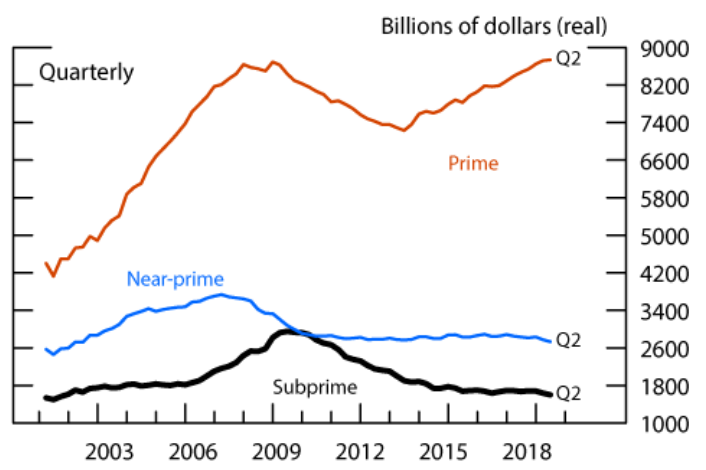

En la gráfica anterior podemos percibir como es que en el pico más alto de los créditos **subprime** representa menos del $28\%$ en comparativa con los créditos **prime**, lo importante aquí es resaltar como es que una pequeña proporción de malos créditos es capaz de traer a la baja todo un sistema financiero. En este sentido y conociendo ahora el impacto que puede tener la **probabilidad de default**, es importante para las instituciones financieras determinar este valor para así obtener una **tasa de interés** óptima y poder definir ese problema de flujos de la mejor manera posible. Antes de definir el proceso de aprobación, se busca definir rapidamente la representación de un crédito, y la idea más básica es a través de los **flujos de efectivo**:

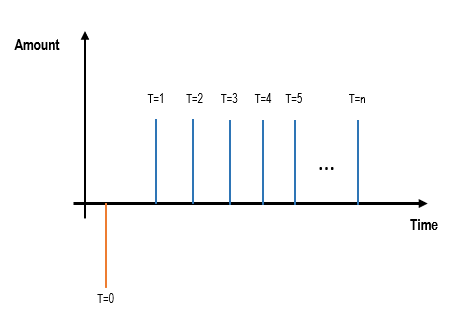

Entonces, es a través de los **flujos de efectivo** que nosotros como institución financiera seremos capaces de parametrizar nuestro producto de crédito, ¿cómo?, a través del concepto de **Tasa Interna de Retorno**, la cual se define matemáticamente como la siguiente expresión:

$$0 = \text{NPV} = \sum_{t=1}^{T} \frac{C_{t}}{(1+\text{IRR})^{t}}-C_{0}$$

Donde,

- $C_{t}$: Representa el flujo de efectivo en el tiempo $t$.
- $C_{0}$: Representa la inversión inicial (monto prestado).
- $\text{IRR}$: Representa la tasa interna de retorno.
- $t$: El número de periodos en los que existe el crédito.

En esta misma línea, la idea detrás de la definición de la mejor tasa de interés posible se reduce a un simple problema de optimización numérica, ¿qué se busca optimizar?, el valor esperado de la **Tasa Interna de Retorno**.

$$E[\text{IRR}] = \sum_{t=1}^{T} p_{i} \text{IRR}_{i}$$

Donde $p_{i}$ representa la **probabilidad de default** asociada a ese punto del tiempo y $\text{IRR}_{i}$ la **tasa interna de retorno** al tiempo $t$. Finalmente podemos mapear todo el proceso de solicitud hasta un pre-aprobamiento a través del siguiente diagrama.

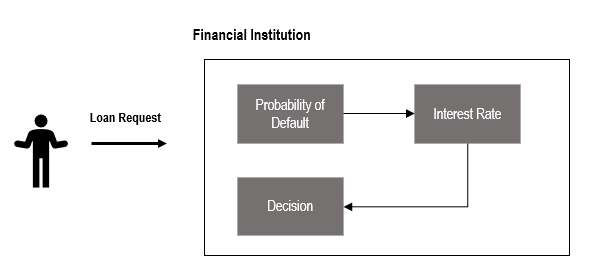

## Objetivos.
---

## Definición del problema.
---

Como previamente se mencionó, el fenómeno de estudio se puede parametrizar a través de una **Tasa Interna de Retorno**, sin embargo antes de llegar a ese punto debemos definir la **probabilidad de default** y para obtener dicho valor se propone la evaluación de al menos $3$ de **clasificación binaria** que nos ayudarán a entender dicha probabilidad:

1. **Regresión Logística Bayesiana**
2. **Regresión Logística**
3. **Árboles de Decisión**

Antes de comenzar a trabajar en el modelado, definiremos primero un rápido análisis exploratorio de datos para entender de mejor manera el conjunto con el cual estaremos trabajando.

### Descripción de la Base de Datos.

### Análisis Exploratorio de Datos

In [7]:
# Libraries to use
import sys
import json
from typing import List, Dict, Optional, Union

import Binning as bn
from Woe import WoeMapper

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from scipy.optimize import minimize_scalar
import bambi as bmb
import arviz as az
import warnings
warnings.filterwarnings('ignore')

import missingno as mgno
sns.set(color_codes=True) # Plottling configuration

# Read raw data
raw_data = pd.read_csv("files/data.csv").drop("customer_id", axis=1)

raw_data.head()

,customer_age,months_at_address,residence_status,employment,income,months_with_bank,other_credits,balance,status
0,53,62,Tenant,Unknown,50000,55,Yes,1055.90,0
1,61,22,HomeOwner,Employed,52000,25,Yes,1161.60,0
2,47,30,Tenant,Employed,37000,61,No,877.23,0
3,50,75,HomeOwner,Employed,53000,20,Yes,157.37,0
4,68,56,HomeOwner,Employed,53000,14,Yes,561.84,0


## Probabilidad de Default.
---

Como previamente se mencionó se propone evaluar $3$ modelos diferentes, uno con enfoque bayesiano y otros $2$ desde una perspectiva frecuentista.

### Regresión Logística Bayesiana.

Para esta primera evaluación inicial estaremos trabajando con el enfoque bayesiano de una **Regresión Logística**. La idea básica detrás de este modelo es aplicar incertidumbre a los parámetros que componen a una regresión logística normal, de manera que el problema principal se encuentra en definir la distribución posterior de los parámetros.

$$
p(y | w, X) p(w),
$$

Donde la función de verosimilitud se define como:

$$
\mathcal{L} (w) = p(y | w, X) = \prod_{i=1}^{N} p(y_i| w, x_i) = \prod_{i=1}^{N}\sigma(x_i^T w)^{y_i} (1 - \sigma(x_i^T w))^{1 - y_i}.
$$

Y la previa o regularizador se define como una normal

$$
p(w) = \mathcal{N}(w | 0, \alpha I)
$$

Entendiendo la complejidad computacional que este método pueda traer, el modelo lo definiremos a través de las siguientes variables predictoras:

- **customer_age**
- **months_at_address**
- **income**
- **months_with_bank**
- **balance**

In [14]:
# Let's define our bayesian logistic regression model
bayesian_data = raw_data[['customer_age', 'months_at_address', 'income', 'months_with_bank', 'balance', 'status']]
bayesian_data['balance'] = bayesian_data['balance'].astype(int)

model = bmb.Model("status ~ customer_age + months_at_address + income + months_with_bank + balance",
                  bayesian_data, family="bernoulli")

n_posterior = 40
n_chains = 2

idata_ = model.fit(
    tune=100,
    draws=n_posterior,
    chains=n_chains,
    init='adapt_diag',
    cores=-1
)

Modeling the probability that status==1
Only 40 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
C:\Users\bryan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\bryan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Sequential sampling (2 chains in 1 job)
NUTS: [balance, months_with_bank, income, months_at_address, customer_age, Intercept]


Sampling 2 chains for 100 tune and 40 draw iterations (200 + 80 draws total) took 10992 seconds.
C:\Users\bryan\anaconda3\lib\site-packages\pymc3\sampling.py:643: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9249840143745314, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


Wall time: 3h 3min 30s


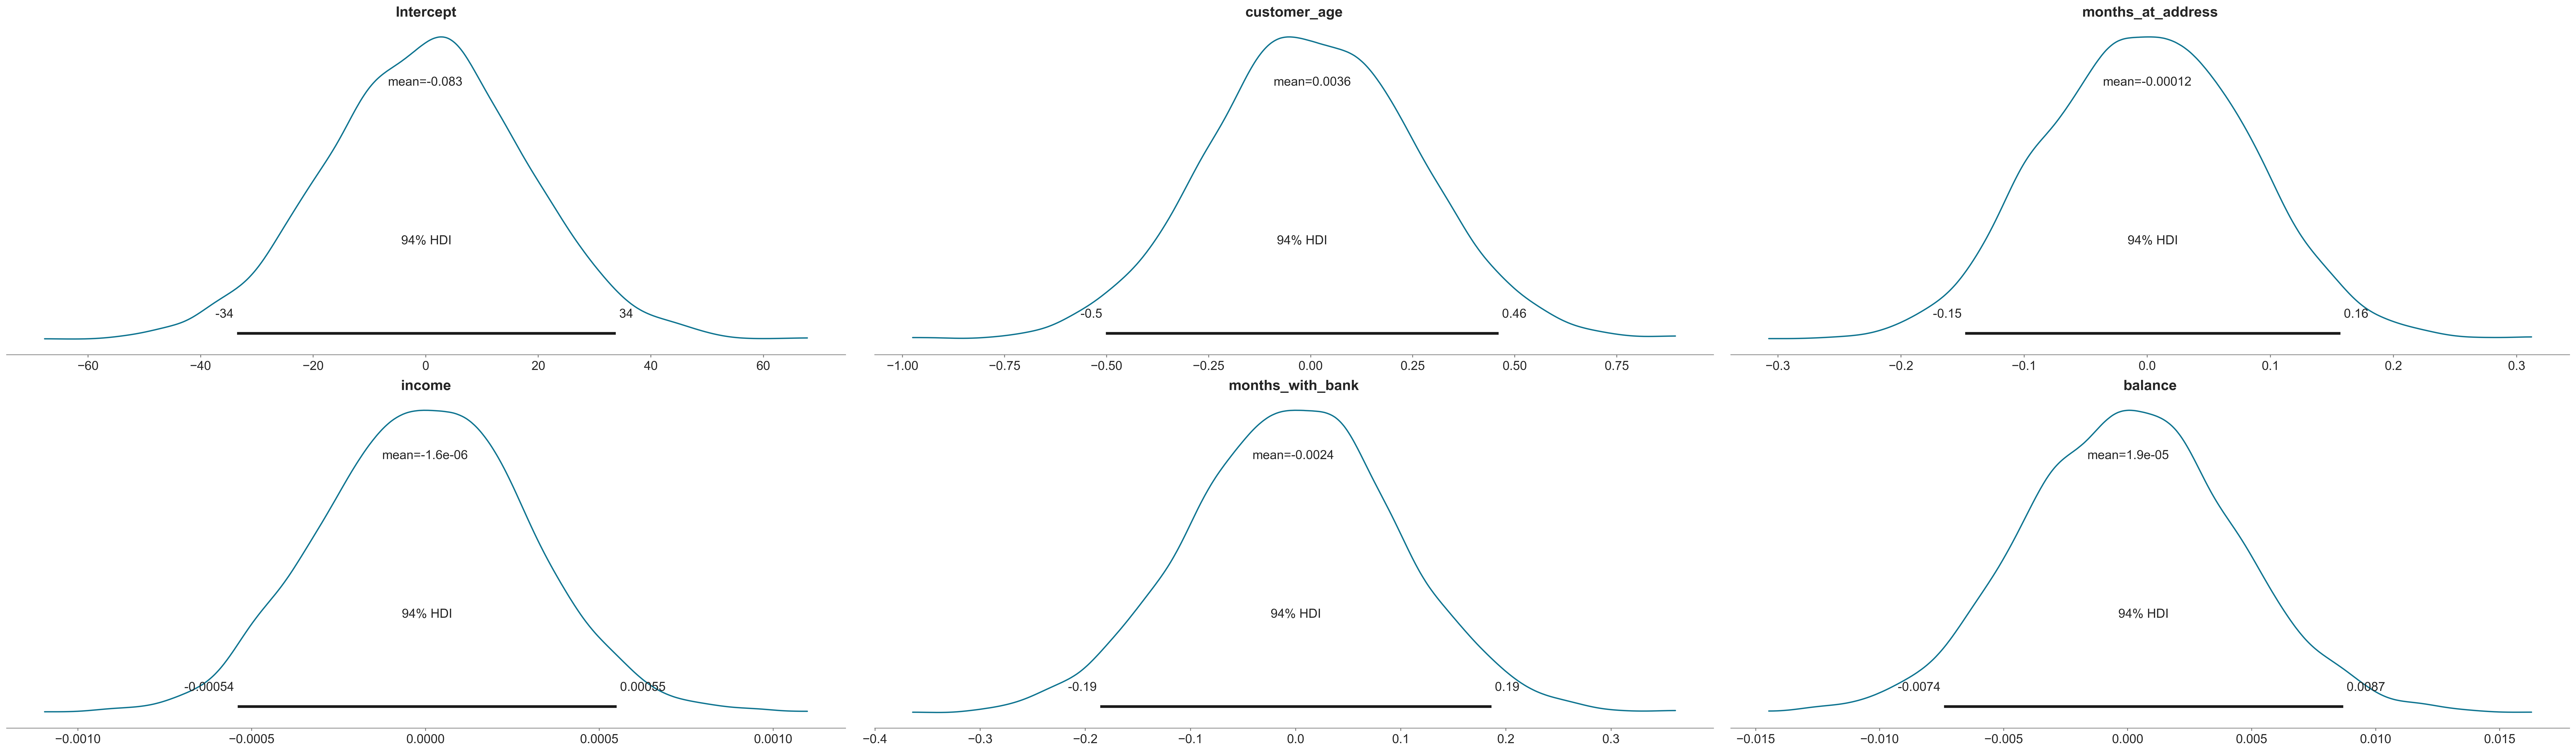

In [75]:
# Let's look at our prios
model.plot_priors();

De las previas que utiliza el algoritmo podemos percatarnos que todas pertenecen a una **distribución normal**, con diferentes parámetros y rangos.

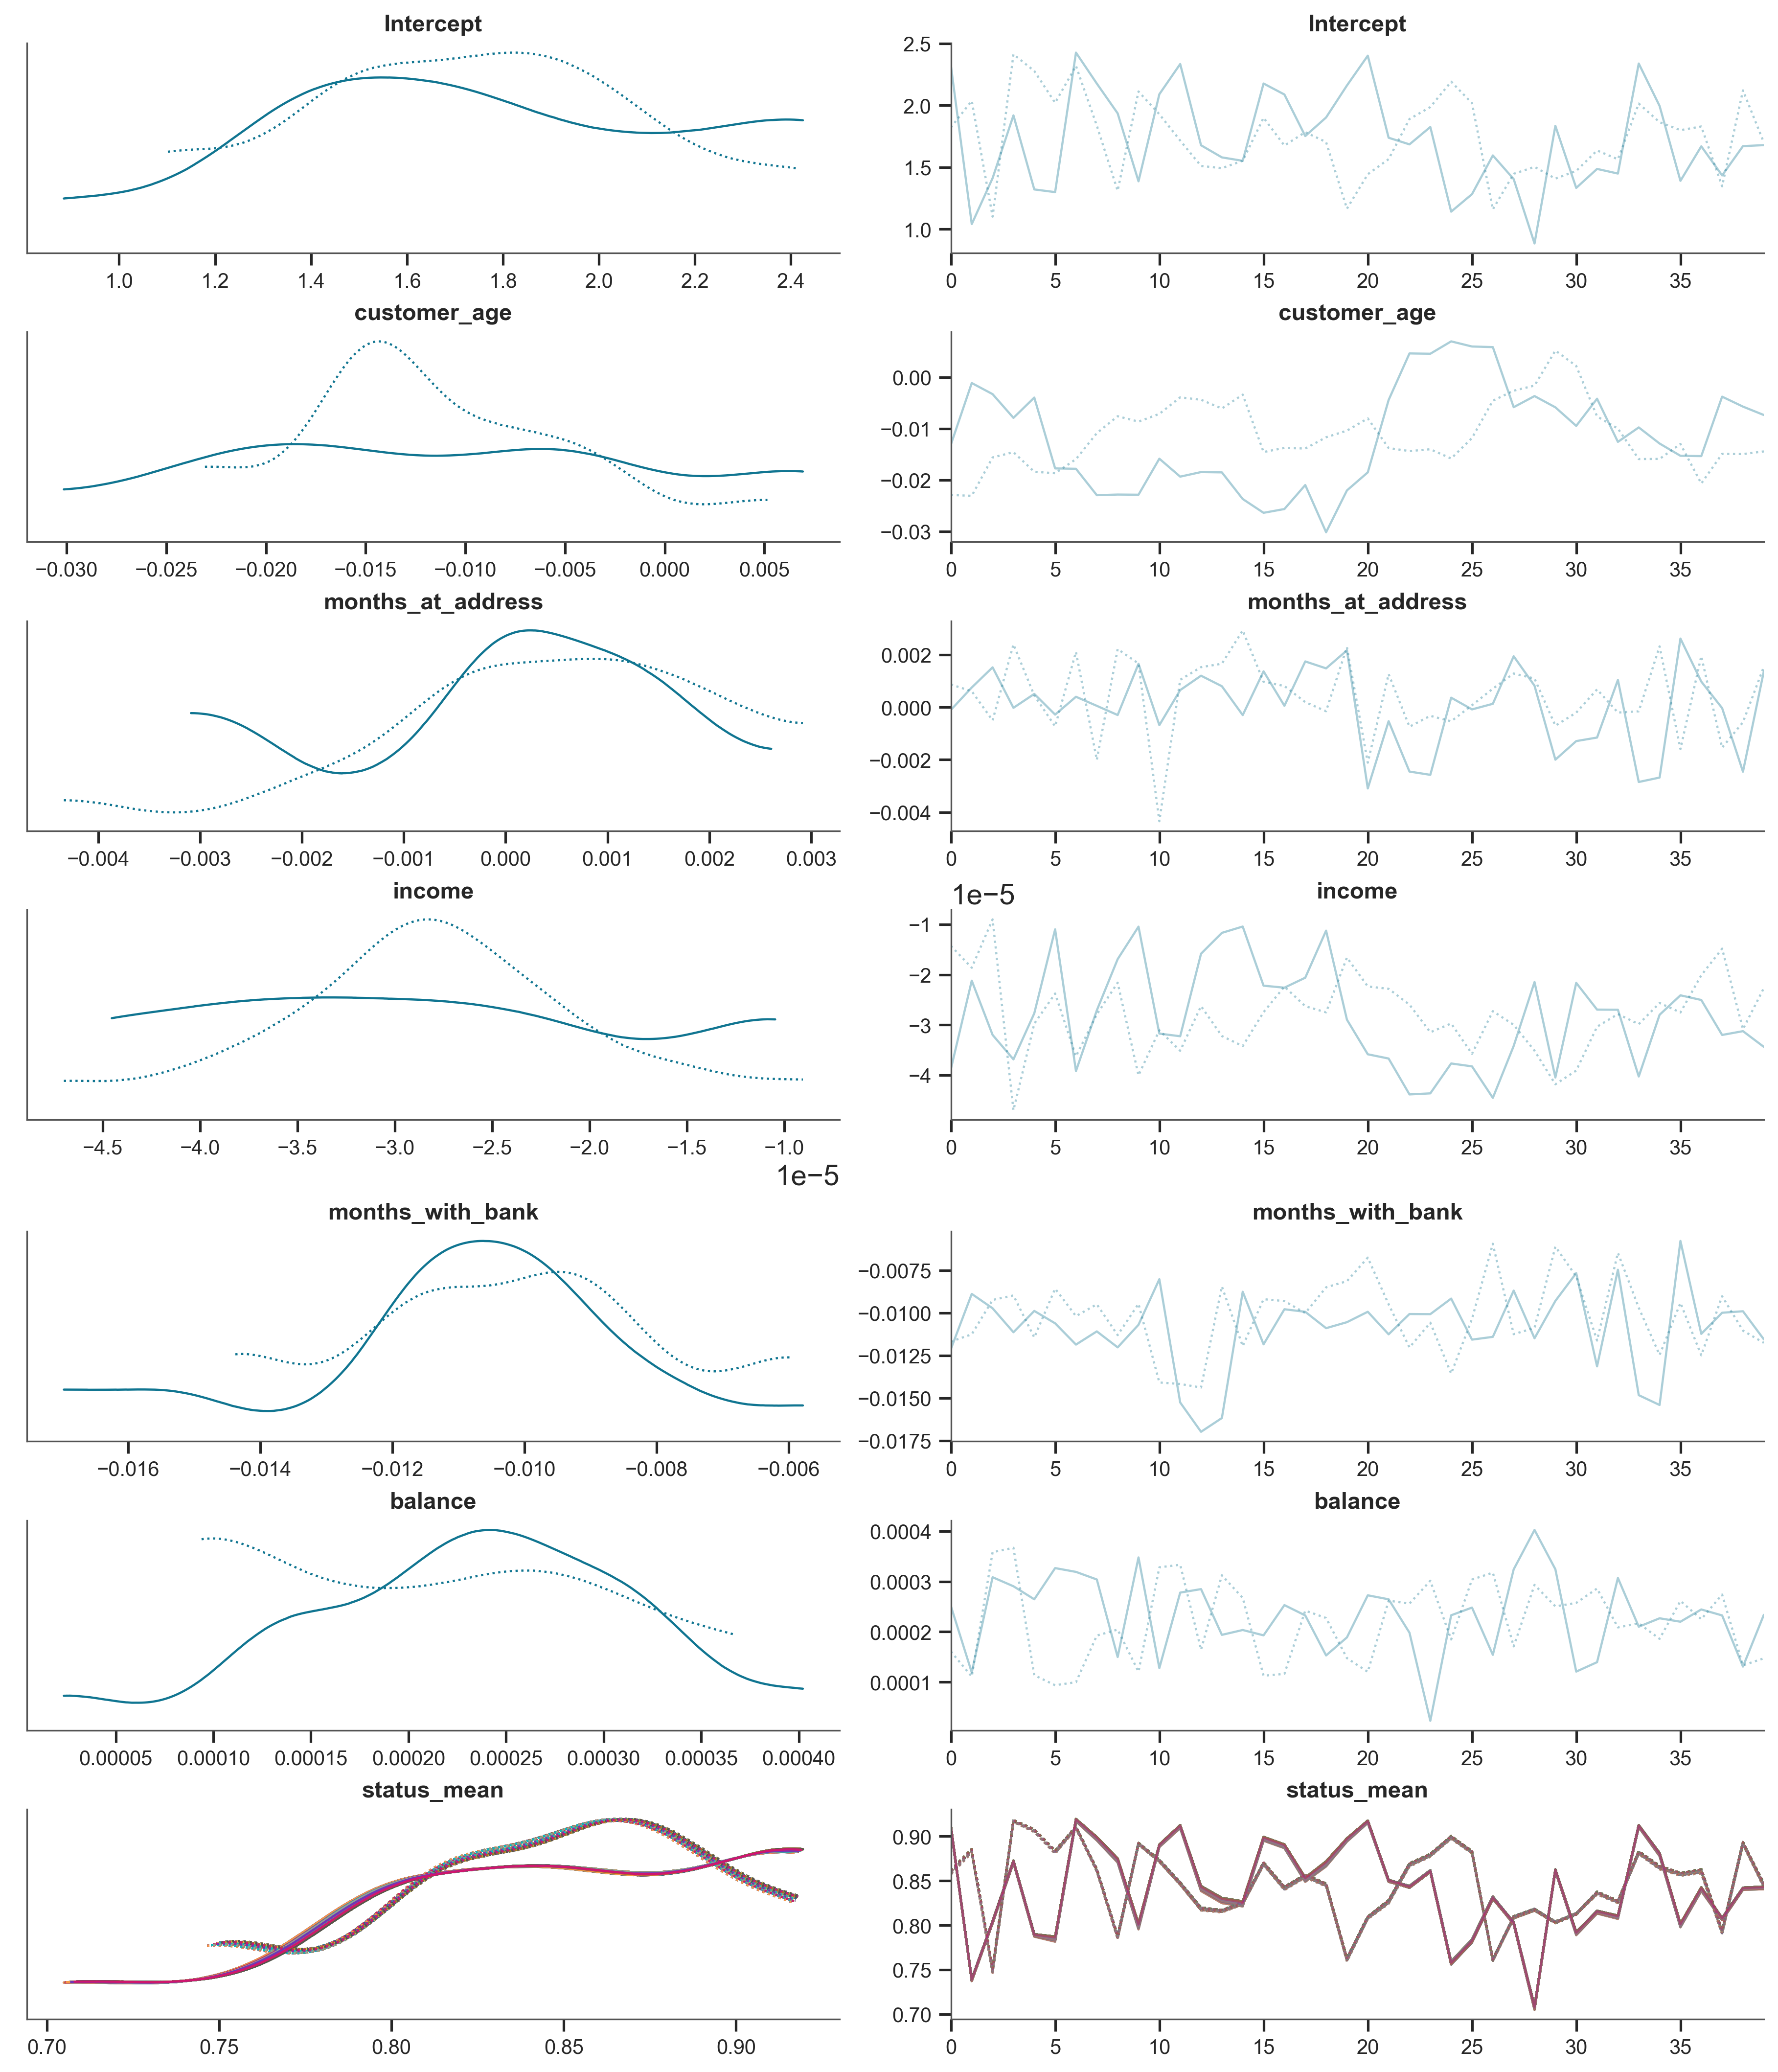

In [76]:
# Now let's display the generated posteriors.
az.plot_trace(idata_);

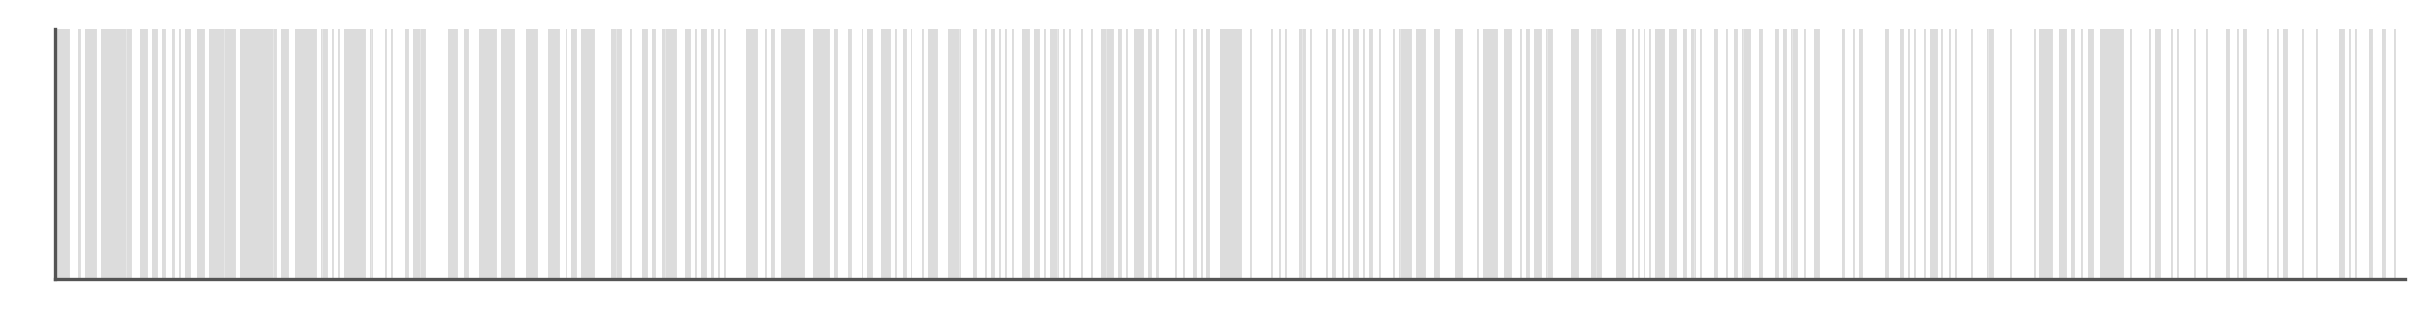

In [55]:
# Let's see our separation plot
chains = idata_.posterior.chain.shape[0]
draws = idata_.posterior.draw.shape[0]
model.predict(idata_, kind="pps")

az.style.use("arviz-doc")
ax = az.plot_separation(idata_, y='status', y_hat='status', figsize=(8,1), color='k');

Como podemos obsevar a primera instancia en la **gráfica de separación**, no existe una clara distinción entre las categorías predecidas y los valores actuales de la base de datos, esto nos da a entender que la clasificación que esta siendo propuesta por el modelo de **Regresión Logística Bayesiana** no esta siendo capaz de realmente definir e identificar el status de default de un cliente.

Con esto en consideración podemos comenzar a entender que probablemente la implementación de enfoque bayesiano a este problema, puede que no sea del todo óptimo. Para poder definir desde una perspectiva más cuantitativa esta situación lo que se propone hacer es definir una métrica de error para cada una de las distribuciones posteriores en comparación con la salida real del dataset. Para realizar estas pruebas se propone utilizar el métrico **F1 Score**, el cual recordemos nos ayuda a obtener una medida de desempeño más real aún cuando estamos trabajando con un conjunto de datos _desbalanceado_. Dicho valor lo podemos calcular a partir de la siguiente expresión:

$$F_{1} = \frac{\text{tp}}{tp+\frac{1}{2} \big(\text{fp} + \text{fn} \big)}$$

In [72]:
# Let's find out the maximum score for the posterior distributions
posterior_scores = [metrics.f1_score(data['status'], idata_.posterior_predictive['status'].values[j,i,:])
                    for i in range(n_posterior) for j in range(n_chains)]

print(f'La posterior calculada con mayor F1 score tiene un valor de: {round(max(posterior_scores), 4)}')

La posterior calculada con mayor F1 score tiene un valor de: 0.456


Como podemos observar a partir de la obtención de los **F1 Scores** en realidad las predicciones que se encuentra otorgando el modelo de **Regresión Logística Bayesiana** dejan bastante a desear, de hecho se encuentran considerablemente alejadas de la realidad. Con esto en cuenta podemos descartar la implementación del mismo para la definición de la **probabilidad de default**, ya que el resultado es simplemente malo y además la complejidad computacional es mucho mayor en comparativa con modelos mucho más sencillo y que pueden otorgar un mejor performance.

### Regresión Logística.

Para comenzar a trabajar ahora con la **Regresión Logística** pero ahora ya sin el enfoque bayesiano la idea será similar, generar un modelo de clasificación, pero en este caso utilizaremos todas las variables disponibles en la composición del mismo, de manera que:

$$p(y_{i}=1 | w, x_{i}) = \sigma(x_{i}^{T}w)$$

Donde $x_{i}^{T}$ representa la matriz de todos los posibles valores de cada variable disponible en el conjunto de datos, y por otra parte $w$ define los pesos de la combinación lineal.

Otra cuestión con la cual se estará trabajando en el desarrollo del modelo y en general en el procesamiento de la metodología, es el uso de una transformación de la base de datos a través de **WOE (Weights of Evidence)**. Este esquema es ampliamente utilizado en la preparación y como parte del procesamiento para los predictores en un modelo de regresión, la idea que sustenta la aplicación de esta técnica se basa en que con dicho encoding tenemos la posibilidad potencial de mapear información no lineal en el modelo.

En ese sentido lo primero que haremos será definir dicha transformación.

In [3]:
# First we need to generate a binning process (just for scorecard representation purposes)
data = raw_data.copy()
for cont_variable in bn.bins.keys():
    print("Transforming continuous variable to categorical: ", cont_variable)
    data[cont_variable] = [bn.get_label(val=val, var=cont_variable) for val in data[cont_variable].values]
    
data.head()

Transforming continuous variable to categorical:  customer_age
Transforming continuous variable to categorical:  income
Transforming continuous variable to categorical:  months_with_bank
Transforming continuous variable to categorical:  months_at_address
Transforming continuous variable to categorical:  balance


,customer_age,months_at_address,residence_status,employment,income,months_with_bank,other_credits,balance,status
0,"(46, 58)","(23, 83)",Tenant,Unknown,"(47000, inf)","(45, 71)",Yes,"(558, 1254)",0
1,"(58, inf)","(-inf, 23)",HomeOwner,Employed,"(47000, inf)","(12, 45)",Yes,"(558, 1254)",0
2,"(46, 58)","(23, 83)",Tenant,Employed,"(33000, 42000)","(45, 71)",No,"(558, 1254)",0
3,"(46, 58)","(23, 83)",HomeOwner,Employed,"(47000, inf)","(12, 45)",Yes,"(-inf, 558)",0
4,"(58, inf)","(23, 83)",HomeOwner,Employed,"(47000, inf)","(12, 45)",Yes,"(558, 1254)",0


In [4]:
# Let's define all the features we'll be using
feature_columns = data.drop("status", axis=1).columns.tolist()

# Create WoeMapper instance and fit with data
woe_mapper = WoeMapper(feature_columns)
woe_mapper.fit(data)

# Create training dataset
training = woe_mapper.transform(data)
training.head()

,customer_age,months_at_address,residence_status,employment,income,months_with_bank,other_credits,balance
0,0.235324,0.025331,-0.095564,-0.199468,0.464963,0.211872,0.053364,-0.106289
1,0.817051,-0.073307,0.019329,0.241800,0.464963,-0.103491,0.053364,-0.106289
2,0.235324,0.025331,-0.095564,0.241800,-0.002221,0.211872,-0.268316,-0.106289
3,0.235324,0.025331,0.019329,0.241800,0.464963,-0.103491,0.053364,0.238383
4,0.817051,0.025331,0.019329,0.241800,0.464963,-0.103491,0.053364,-0.106289


Ya con la transformación y el conjunto de datos preparados, podemos ahora sí ajustar la **Regresión Logística**.

In [5]:
# Adjust the logistic regression to the data
x = training[feature_columns]
y = [1 if val == 0 else 0 for val in data["status"].values]

# Train Logistic Regression
clf = LogisticRegression(random_state=0).fit(x, y)

# Predictions
y_pred = clf.predict(training[feature_columns])
print(f"F1 Score from logistic regression model: {round(metrics.f1_score(y, y_pred), 4)}")

F1 Score from logistic regression model: 0.8021


Como podemos observar a partir de los resultados de la **Regresión Logística** se obtuvo un modelo con un **F1 Score** de alrededor de $0.8021$, contrastando los resultados obtenidos en el enfoque bayesiano vemos que existe una mejora significativa no solo en términos de desempeño pero sobre todo en costos computacionales.

En términos generales se alcanza a percibir que el nuevo modelo propuesto alcanza a definir de mejor manera el comportamiento en el default de los clientes, en gran medida se considera que el buen resultado otorgado también fue influenciado por la transformación realizada, la cual nos ayuda a mapear relaciones no lineales en el conjunto de datos. Sin embargo, ahora lo que buscaremos será definir algún otro modelo no lineal, para ver si es que somos capaces de parametrizar de mejor manera el default.

### Árboles de Decisión.

La idea básica detrás de los **Árboles de Decisión** es que se utilicen las características de un conjunto de datos para crear preguntas de solución binaria (sí o no), y de esta manera seguir dividiendo la base de datos hasta que se logren aislar todos los puntos en cada clase. Entonces, en términos generales se estará descomponiendo la decisión en nodos para de esta manera entender como es que la probabilidad de default va evolucionando.

Para poder definir de manera óptima nuestro **Árbol de Decisión** es fundamental ajustar algunos hiperparámetros, entre ellos esta la profundidad del árbol, para ello se realiza un proceso iterativo para encontrar el punto de inflexión donde obtenemos la máxima medida de desempeño posible, en nuestro caso recordemos estamos trabajando con el **F1 Score**.

El valor de profundidad que maximiza el F1 Score es: 16 niveles


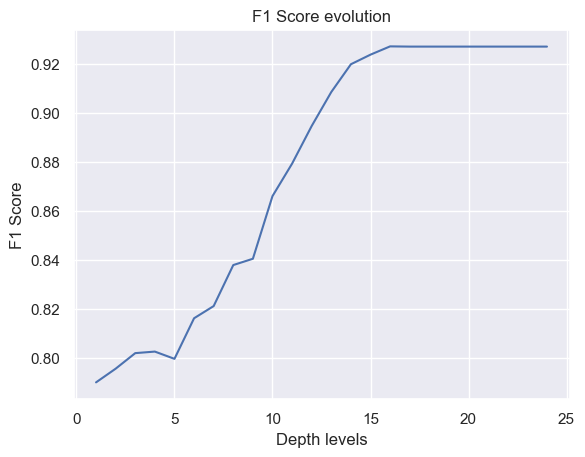

In [27]:
# Let's find the max depth hyperparameter
max_depth_range = list(range(1, 25))

# List to store the accuracy for each value of max_depth
accuracy = []
for depth in max_depth_range:
    
    clf_2 = DecisionTreeClassifier(max_depth = depth, 
                                   random_state = 0)
    clf_2.fit(x, y)
    y_pred_2 = clf_2.predict(training[feature_columns])
    accuracy.append(metrics.f1_score(y, y_pred_2))
    
plt.plot(max_depth_range, accuracy);
plt.title('F1 Score evolution');
plt.xlabel('Depth levels');
plt.ylabel('F1 Score');

max_score = accuracy.index(max(accuracy)) + 1
print(f'El valor de profundidad que maximiza el F1 Score es: {max_score} niveles')

In [28]:
# Let's define the decision tree classifier
clf_2 = DecisionTreeClassifier(max_depth=max_score, min_samples_split=2, random_state=0).fit(x, y)

# Predictions
y_pred_2 = clf_2.predict(training[feature_columns])
print(f"F1 Score from decision tree classifier model: {round(metrics.f1_score(y, y_pred_2), 4)}")

F1 Score from decision tree classifier model: 0.9271


Como podemos percibir, el _performance_ de la solución propuesta por **Árboles de Decisión** es considerablemente mejor que el desarrollado por la **Regresión Logística**.

Una pregunta natural sería ¿por qué?, y bien para responder esto es necesario recordar que en la **Regresión Logística** necesita o depende de que exista una relación lineal entre las variables predictoras y la variable objetivo. A continuación se puede observar dicha relación en un espacio de $\mathbb{R}^{2}$:

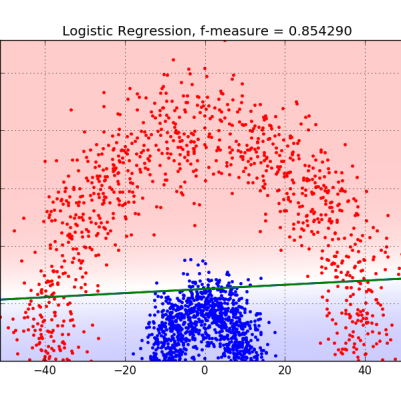

Como se puede observar en el ejemplo anterior, existe un limite claro entre ambas categorias, sin embargo la relación lineal no es del todo clara, y es justamente esta situación la que puede estar sesgando los resultados del modelo de regresión. Ahora solo para contrastar visualicemos como es que un **Árbol de Decisión** se comporta:

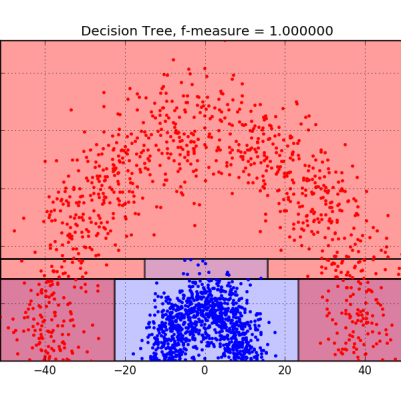

## Estimación de tasa de interés.
---

Recapitulando los resultados presentes en la sección previa, el modelo que mejor representa el fenómeno de la **probabilidad de default** termina siendo un **Árbol de decisión**. Lo que procede ahora es definir dicha probabilidad dada cierta parametrización de un cliente nuevo que acude a nosotros como institución financiera con una **solicitud de crédito**.

## Conclusiones y presentación de resultados.
---

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Javier Contreras & Bryan Manica.
</footer>